## Import Libraries 

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [280]:
df1 = pd.read_csv("2021.csv")

In [281]:
df2 = pd.read_csv("2022.csv")

In [282]:
df3 = pd.read_csv("2023.csv")

In [283]:
df4 = pd.read_csv("2024.csv")

In [284]:
df5 = pd.read_csv("2024.0.csv")

In [285]:
df6 = pd.read_csv("last.csv")

In [286]:
merged_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)


In [287]:
df = merged_df

In [288]:
df.shape

(2236, 4)

In [289]:
df.head()

,Date,Views,Watch time (hours),Average view duration
0,Total,30375.000,1334.810,0:02:38
1,2021-01-01,34.000,2.152,0:03:47
2,2020-12-31,13.000,0.475,0:02:11
3,2020-12-30,47.000,2.580,0:03:17
4,2020-12-29,78.000,3.535,0:02:43


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2236 non-null   object 
 1   Views                  2235 non-null   float64
 2   Watch time (hours)     2235 non-null   float64
 3   Average view duration  2234 non-null   object 
dtypes: float64(2), object(2)
memory usage: 70.0+ KB


In [291]:
df.isnull().sum()

Date                     0
Views                    1
Watch time (hours)       1
Average view duration    2
dtype: int64

In [292]:
df.dropna(inplace=True)

In [293]:
df = df.drop(index=0)

In [294]:
df.head()

,Date,Views,Watch time (hours),Average view duration
1,2021-01-01,34.000,2.152,0:03:47
2,2020-12-31,13.000,0.475,0:02:11
3,2020-12-30,47.000,2.580,0:03:17
4,2020-12-29,78.000,3.535,0:02:43
5,2020-12-28,158.000,7.245,0:02:45


Eğer parse_dates=['timestamp'] argümanını kullanmazsak ve sadece df = pd.read_csv("store_sharing.csv") şeklinde bir kod çalıştırırsak, "timestamp" sütunu varsayılan olarak string olarak okunur ve sıradan bir sütun olarak işlenir:

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 1 to 2235
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   2233 non-null   object 
 1   Views                  2233 non-null   float64
 2   Watch time (hours)     2233 non-null   float64
 3   Average view duration  2233 non-null   object 
dtypes: float64(2), object(2)
memory usage: 87.2+ KB


In [296]:
# 'Date' sütununda "Total" değerine sahip satırları bulmak
total_rows = df[df['Date'] == 'Total']
print(total_rows)  # "Total" olan satırları görmek için

       Date     Views  Watch time (hours) Average view duration
319   Total 20463.000            1108.698               0:03:15
686   Total 10591.000             529.482               0:02:59
1053  Total  4883.000             229.714               0:02:49
1413  Total 13815.000             685.127               0:02:58
1915  Total  9661.000             495.768               0:03:04


In [297]:
# "Total" olan satırları DataFrame'den kaldırmak
df = df[df['Date'] != 'Total']

In [298]:
# 'date' sütununu datetime formatına çevirme
df['Date'] = pd.to_datetime(df['Date'])
df.drop('Average view duration', axis=1, inplace=True)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 1 to 2235
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2228 non-null   datetime64[ns]
 1   Views               2228 non-null   float64       
 2   Watch time (hours)  2228 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 69.6 KB


In [300]:
df.to_csv("my_data.csv", index=False) 

In [301]:
df = pd.read_csv("my_data.csv", parse_dates=['Date'], index_col="Date")

Datamızın direk index e gelmesi için ve type ı datetime olması için "parse_dates" ve "index_col" parametrelerini kullandık.
"Parse_dates" ı yapmaz isek "Datetime" Index olmazdı ve bu feature Object olarak tanımlanırdı.

index_col="timestamp" ifadesini kullanarak "timestamp" sütununu veri kümesinin indeksi olarak belirttiğimizde, veri çerçevesindeki her satır benzersiz bir zaman damgasıyla tanımlanır. Bu durumda "timestamp" sütunu, satırları birbirinden ayıran benzersiz bir kimlik görevi görür.

Bunun bazı faydaları şunlardır:

Hızlı erişim: Veri çerçevesindeki belirli bir zaman damgasına ait satırlara hızlı bir şekilde erişebilirsiniz. Zaman damgasına dayalı indeksleme, örneğin belirli bir tarih aralığındaki verileri seçmek veya belirli bir zamanda meydana gelen olayları incelemek gibi işlemleri kolaylaştırır.

Zaman serisi analizi: Zaman serisi verileriyle çalışırken, verileri zamana göre sıralamak ve analiz etmek önemlidir. Zaman damgasını indeks olarak belirleyerek, zaman serisi analizine yönelik çeşitli teknikleri kullanabilirsiniz. Örneğin, trendleri, mevsimsellikleri veya zaman içindeki değişiklikleri analiz edebilirsiniz.

Veri hızlandırma: Veri kümesini bir zaman damgasına göre indekslemek, veriye yapılan sorguları hızlandırabilir. Verinin indekslenmesi, belirli bir zaman damgasıyla ilgili satırların hızlı bir şekilde erişilmesini sağlar. Bu, büyük veri kümesi üzerinde yapılan işlemlerde performansı artırabilir.

Grafik çizimi ve görselleştirme: İndekslendiğinde, zaman damgası verilerini içeren veri çerçevesi, doğrudan grafik çizimi ve görselleştirme araçlarına beslenebilir. Zaman serisi verilerini zamanla değişimi gösteren grafikler veya trend analizi gibi görsel temsillerle daha kolay anlayabilirsiniz.

Özetle, zaman damgasını indeks olarak belirlemek, zaman serisi verileriyle çalışırken veriye daha etkili bir şekilde erişmek, analiz etmek ve görselleştirmek için önemli bir adımdır.

In [302]:
df

,Views,Watch time (hours)
Date,,
2021-01-01,34.000,2.152
2020-12-31,13.000,0.475
2020-12-30,47.000,2.580
2020-12-29,78.000,3.535
2020-12-28,158.000,7.245
...,...,...
2024-01-05,47.000,5.211
2024-01-04,10.000,0.166
2024-01-03,8.000,0.244


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2228 entries, 2021-01-01 to 2024-01-01
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Views               2228 non-null   float64
 1   Watch time (hours)  2228 non-null   float64
dtypes: float64(2)
memory usage: 52.2 KB


## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [304]:
df.isnull().sum()

Views                 0
Watch time (hours)    0
dtype: int64

In [305]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Views,2228.000,39.369,40.301,1.000,14.000,27.000,51.000,408.000
Watch time (hours),2228.000,1.921,1.964,0.000,0.530,1.239,2.718,13.449


Deep Learning de Outlier ların, Machine Learning de olduğu kadar önemi bulunmamaktadır!

### Plot Breakdowns of Data

In [306]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour 
df["date"] = df.index.date

In [307]:
df.sample(7)

,Views,Watch time (hours),year,month,day,dayofweek,hour,date
Date,,,,,,,,
2023-09-03,15.000,0.543,2023,9,3,6,0,2023-09-03
2020-03-16,115.000,2.439,2020,3,16,0,0,2020-03-16
2021-08-23,51.000,1.851,2021,8,23,0,0,2021-08-23
2023-11-14,5.000,0.271,2023,11,14,1,0,2023-11-14
2021-03-28,24.000,1.064,2021,3,28,6,0,2021-03-28
2024-05-04,16.000,0.631,2024,5,4,5,0,2024-05-04
2021-02-26,76.000,5.019,2021,2,26,4,0,2021-02-26


***i. Plot watching hours shares over time***

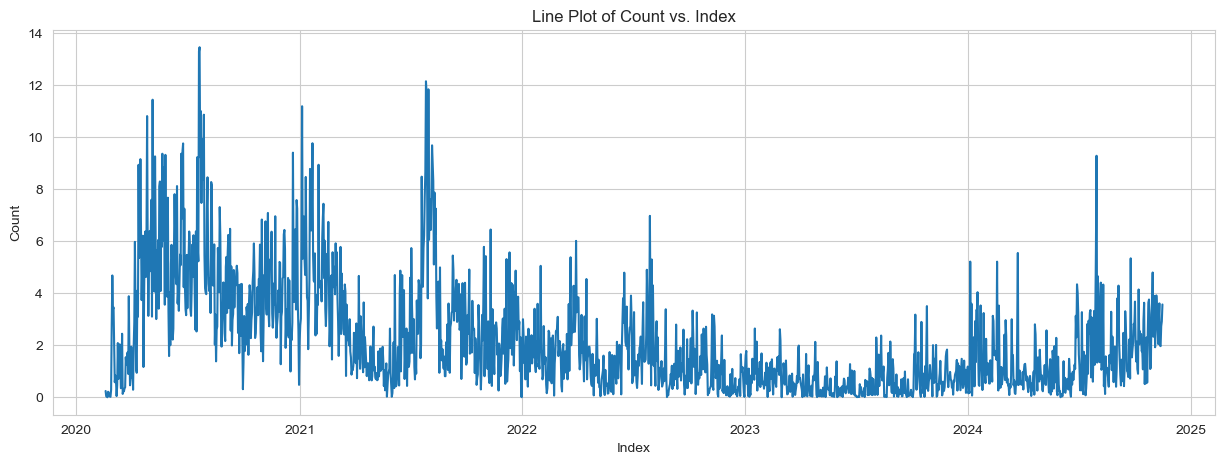

In [308]:
plt.figure(figsize=(15, 5))  # Set the figure size
sns.lineplot(x=df.index, y="Watch time (hours)", data=df)  # Plot using Seaborn's lineplot function

plt.xlabel("Index")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title("Line Plot of Count vs. Index")  # Set the plot title
plt.show()  # Display the plot

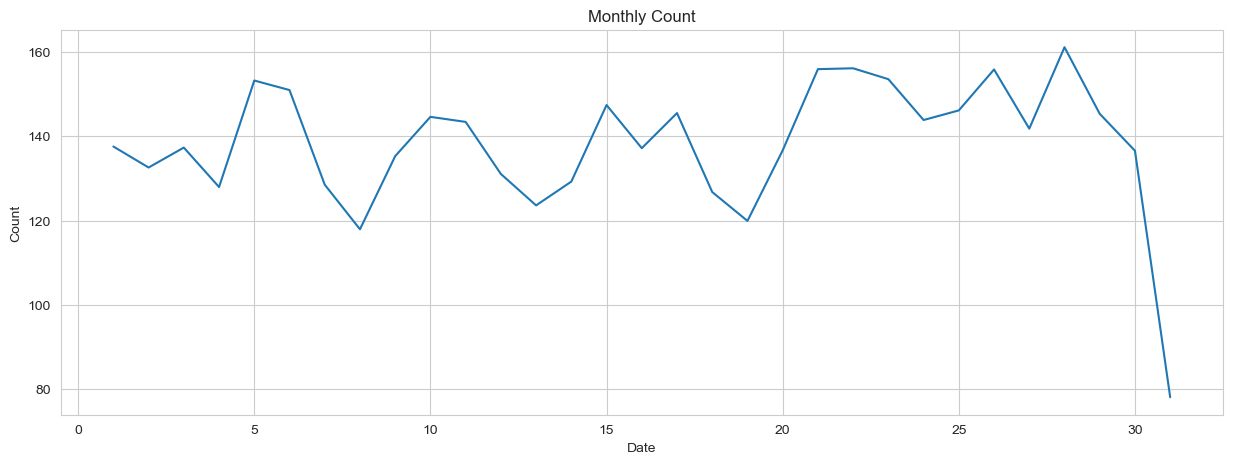

In [309]:
date_cnt = df.groupby("day")["Watch time (hours)"].sum()   # Görseli sadeleştirmek için groupby ile günlük kullanımı

plt.figure(figsize=(15, 5))
sns.lineplot(x=date_cnt.index, y=date_cnt.values)

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Monthly Count")
plt.show()

***ii. Plot watching hours shares by months***

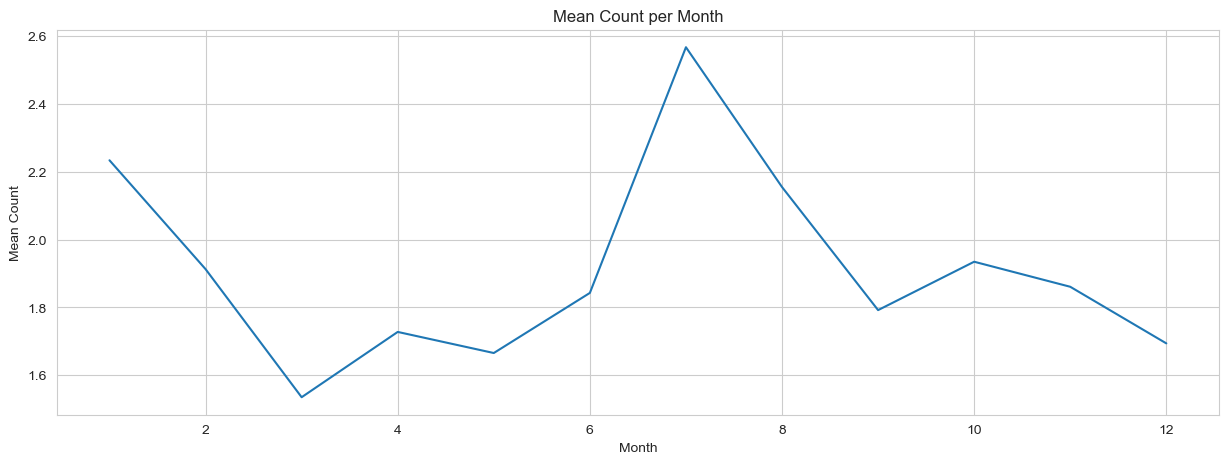

In [310]:
month_cnt = df.groupby("month")["Watch time (hours)"].mean()

plt.figure(figsize=(15, 5))
sns.lineplot(x=month_cnt.index, y=month_cnt.values)

plt.xlabel("Month")
plt.ylabel("Mean Count")
plt.title("Mean Count per Month")

plt.show()

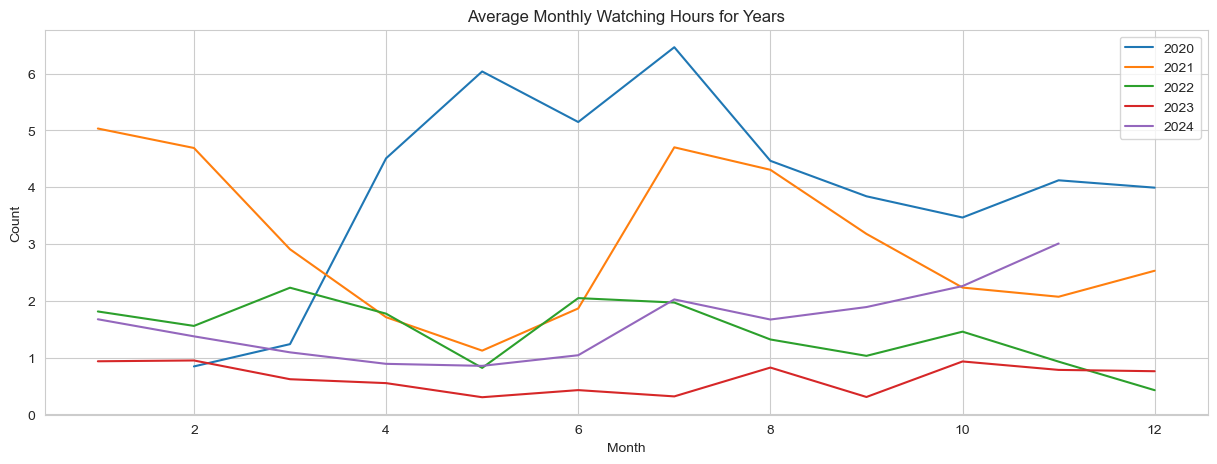

In [311]:
year_month_cnt = df.groupby(["year", "month"])["Watch time (hours)"].mean()    # yıllara sari bir şekilde görmek istersek bunu yapıyoruz.

plt.figure(figsize=(15,5))        #2017 de çok az veri olduğu için burada göremiyoruz. 
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Watching Hours for Years')
plt.show()

***iii. Plot watching hours by hours***

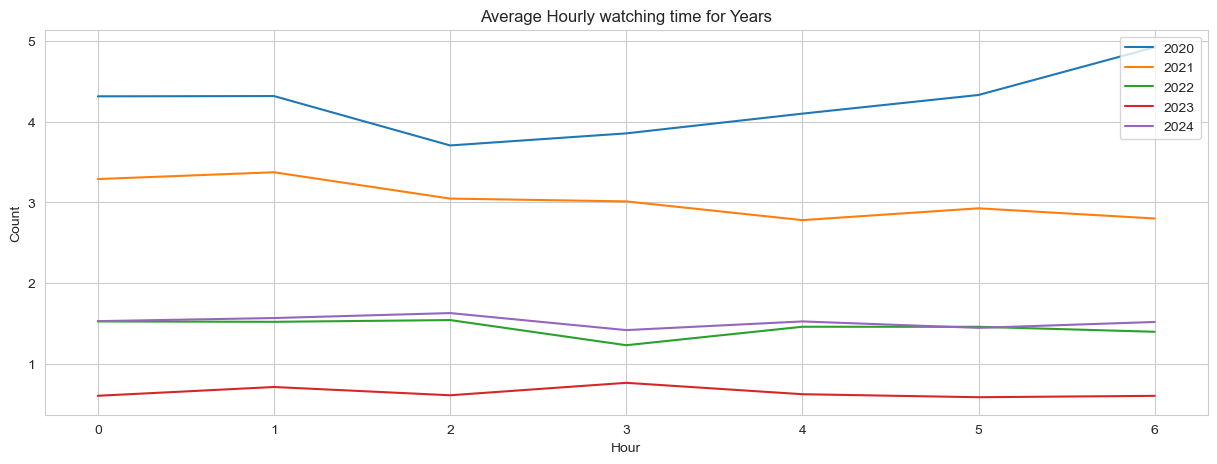

In [312]:
year_hour_cnt = df.groupby(["year", "dayofweek"])["Watch time (hours)"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_hour_cnt[year].index, year_hour_cnt[year],label=year)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly watching time for Years')
plt.show()

***iv. Plot watching hours by day of week***


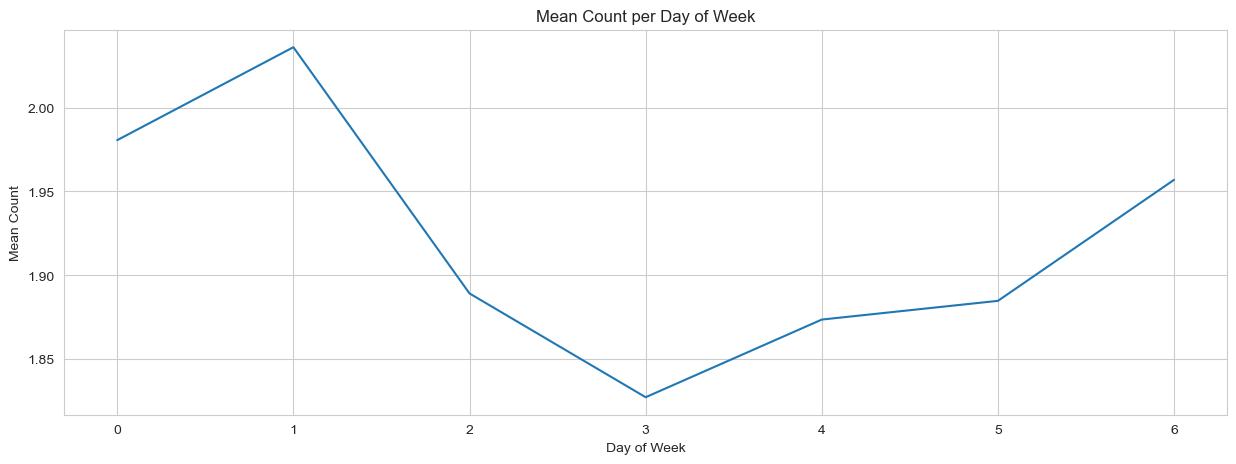

In [313]:
weekday_cnt = df.groupby("dayofweek")["Watch time (hours)"].mean()

plt.figure(figsize=(15, 5))
sns.lineplot(x=weekday_cnt.index, y=weekday_cnt.values)

plt.xlabel("Day of Week")
plt.ylabel("Mean Count")
plt.title("Mean Count per Day of Week")

plt.show()

### Drop unnecessary columns

- Check correlations via heatmap
- Think about time-based features and decide dropping which is unnecessary for the model

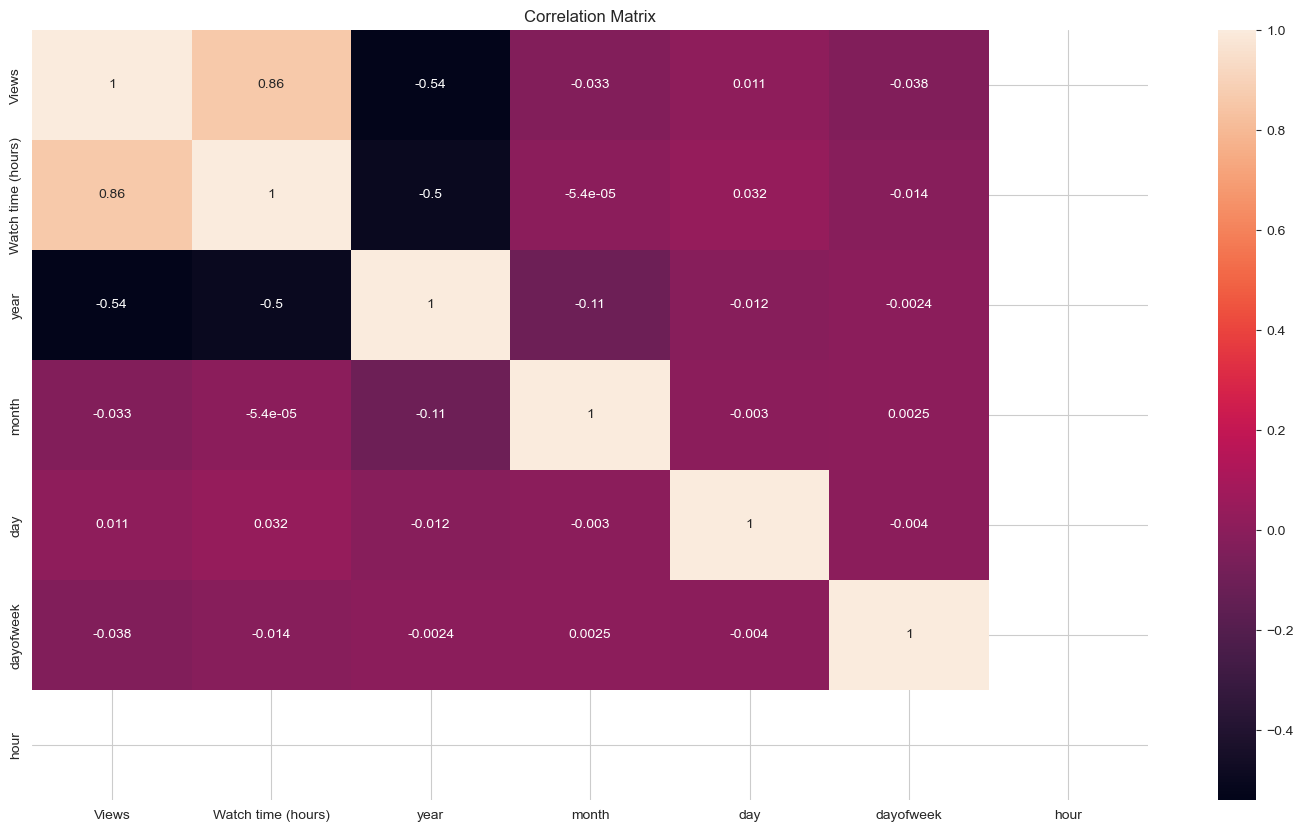

In [314]:
numerical_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisini oluşturalım
correlation_matrix = numerical_df.corr()

# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [315]:
df.head()

,Views,Watch time (hours),year,month,day,dayofweek,hour,date
Date,,,,,,,,
2021-01-01,34.000,2.152,2021,1,1,4,0,2021-01-01
2020-12-31,13.000,0.475,2020,12,31,3,0,2020-12-31
2020-12-30,47.000,2.580,2020,12,30,2,0,2020-12-30
2020-12-29,78.000,3.535,2020,12,29,1,0,2020-12-29
2020-12-28,158.000,7.245,2020,12,28,0,0,2020-12-28


Time Series datalar da ilgisiz sütunlar genel itibari ile düşülür.

## 2. Data Pre-Processing

### Train - Test Split

Appropriately split the data for optimum training.

In [316]:
df.shape

(2228, 8)

In [317]:
df = df[["Watch time (hours)", 'Views']]

In [318]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size

train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

2005 223


In [319]:
train.shape

(2005, 2)

In [320]:
test.shape

(223, 2)

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.


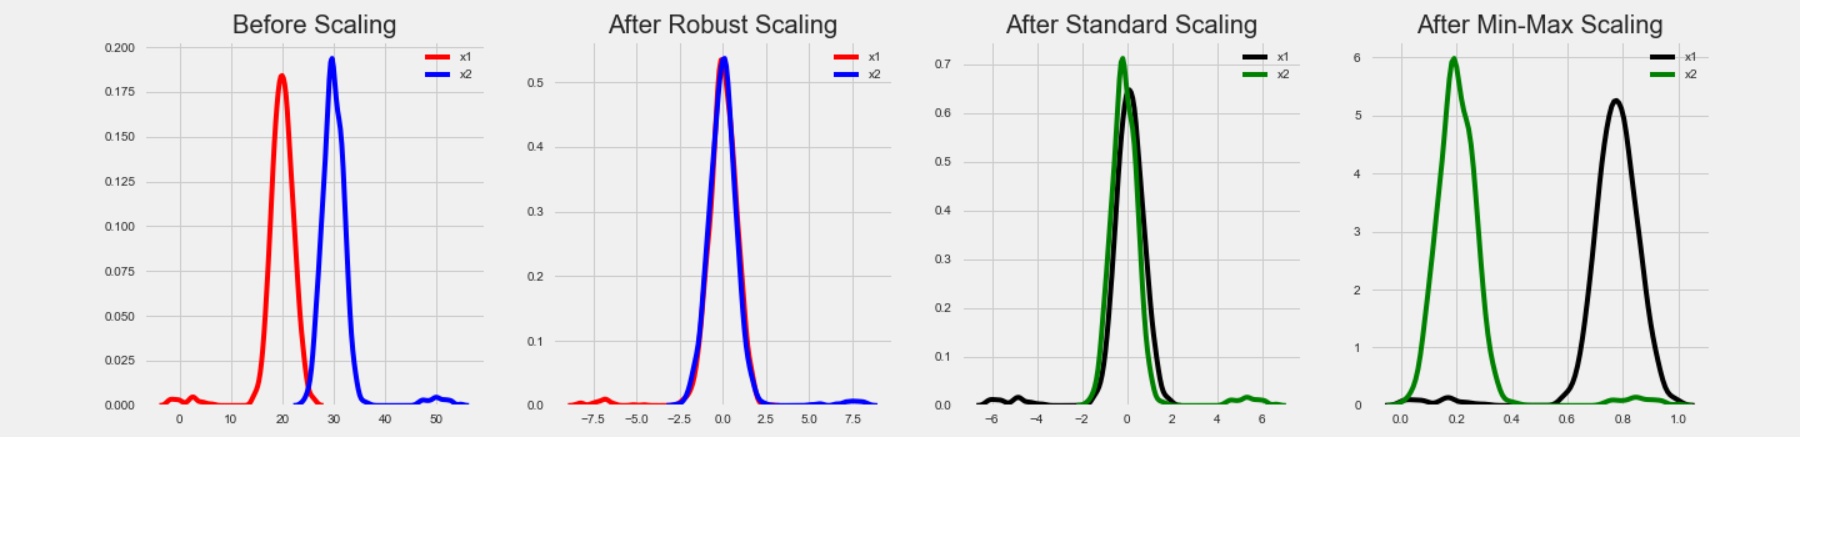

In [321]:
from sklearn.preprocessing import RobustScaler

Robust Scaling, verilerin ortanca ve yüzdelik dilimlere dayalı olarak ölçeklendirilmesini sağlar. Bu nedenle, aykırı değerlerin etkisi azaltılır ve LSTM modelinin daha dengeli bir şekilde eğitilmesine yardımcı olur.

Tek feature olduğu zaman; tüm datayı minmax yapmış, sonrasında feature ın train datasını fit ve transfer yaparken, test olan datasını ise sadece fit yapmıştık. 

In [322]:
df.columns

Index(['Watch time (hours)', 'Views'], dtype='object')

In [323]:
df.head(2)

,Watch time (hours),Views
Date,,
2021-01-01,2.152,34.000
2020-12-31,0.475,13.000


Daha sonra sadece Target sütunumuzu INVERSE TRANSFORM yapacağımız için bunu burada ayırmamız gerekiyor ve ona ayrı bir scale yapmamamız gerekiyor. Tek feature de şu şekilde idi:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [324]:
f_columns = ['Views']

f_transformer = RobustScaler()   # feature ler için kullanılan scale
target_transformer = RobustScaler()   # target için kullanılan scale

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
#  train.loc[:, f_columns] ifadesi, train veri setindeki tüm satırları ve f_columns listesinde belirtilen sütunları seçer
train['Watch time (hours)'] = target_transformer.fit_transform(train[['Watch time (hours)']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
#test.loc[:, f_columns] ifadesi, test veri setindeki tüm satırları ve f_columns listesinde belirtilen sütunları seçer. 

test['Watch time (hours)'] = target_transformer.transform(test[['Watch time (hours)']])

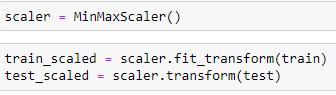

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [325]:
train

,Watch time (hours),Views
Date,,
2021-01-01,0.369,0.154
2020-12-31,-0.354,-0.385
2020-12-30,0.554,0.487
2020-12-29,0.966,1.282
2020-12-28,2.568,3.333
...,...,...
2024-08-15,-0.136,-0.103
2024-08-14,0.118,-0.154
2024-08-13,-0.506,-0.462


In [326]:
def create_dataset(X, y, time_steps=1):  # buraya X ve y train i vereceğiz.
   
    Xs, ys = [], []   # 2 tane boş liste oluşturuyor ve bunlara X ve y train leri atayacağız. 
    for i in range(len(X) - time_steps):      # length i ne ise oraya kadar gidecek.
        v = X.iloc[i:(i + time_steps)].values # her döngüde bana verdiğim train data sını O İLE 1 arasını value yani data frame olarak al
        Xs.append(v)                          # bu değeri ilk listenin içine at. paketler halinde atacak.. 0.24, 1-25 etc..
        ys.append(y.iloc[i + time_steps])   # bu sefer i (0) + 23 (indes) yani 24 nci datayı y ye koy
    return np.array(Xs), np.array(ys)  # daha sonra bunları array e çevir..

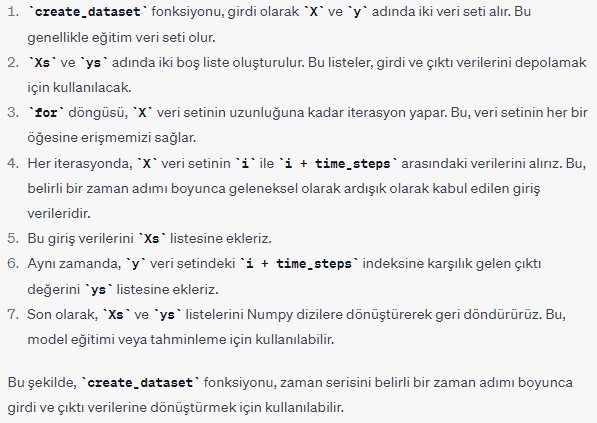

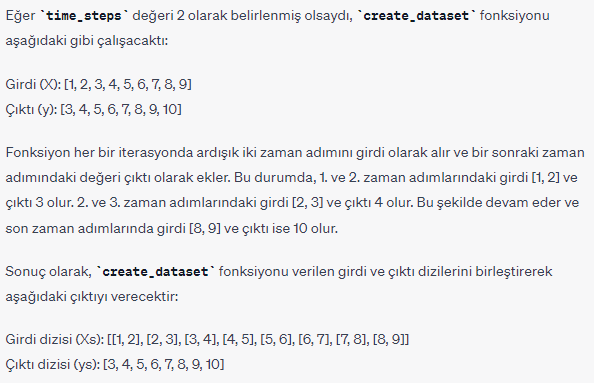

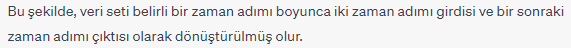

Yukarida olusturdugumuz create_dataset fonksyionunu kullanarak X_train ve y_train' i olusturduk.

In [327]:
time_steps = 20  

X_train, y_train = create_dataset(train, train["Watch time (hours)"], time_steps)
X_test, y_test = create_dataset(test, test["Watch time (hours)"], time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# reshape to [samples, time_steps, n_features]

(1985, 20, 2) (1985,)
(203, 20, 2) (203,)


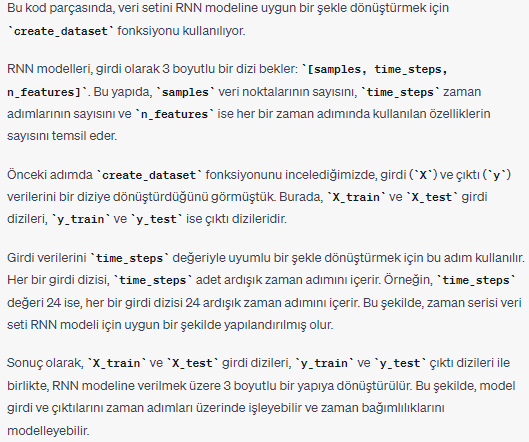

In [328]:
X_train

array([[[ 0.36928655,  0.15384615],
        [-0.35439596, -0.38461538],
        [ 0.55423195,  0.48717949],
        ...,
        [ 1.37835038,  1.35897436],
        [ 0.43299236,  0.64102564],
        [ 1.41857655,  1.17948718]],

       [[-0.35439596, -0.38461538],
        [ 0.55423195,  0.48717949],
        [ 0.96611852,  1.28205128],
        ...,
        [ 0.43299236,  0.64102564],
        [ 1.41857655,  1.17948718],
        [ 0.47196685,  0.8974359 ]],

       [[ 0.55423195,  0.48717949],
        [ 0.96611852,  1.28205128],
        [ 2.56778454,  3.33333333],
        ...,
        [ 1.41857655,  1.17948718],
        [ 0.47196685,  0.8974359 ],
        [ 0.90336225,  0.51282051]],

       ...,

       [[ 1.07950278,  1.69230769],
        [-0.08355993, -0.07692308],
        [-0.38482455, -0.33333333],
        ...,
        [-0.07147482, -0.12820513],
        [-0.1362165 , -0.1025641 ],
        [ 0.11765721, -0.15384615]],

       [[-0.08355993, -0.07692308],
        [-0.38482455, -0.33

In [329]:
X_train[0]

array([[ 0.36928655,  0.15384615],
       [-0.35439596, -0.38461538],
       [ 0.55423195,  0.48717949],
       [ 0.96611852,  1.28205128],
       [ 2.56778454,  3.33333333],
       [ 2.7102594 ,  1.53846154],
       [ 0.89494583,  1.07692308],
       [ 2.22776123,  1.43589744],
       [ 1.89848504,  1.69230769],
       [ 1.02084682,  1.46153846],
       [ 1.56856144,  3.12820513],
       [ 3.49643921,  4.94871795],
       [ 0.68043506,  0.79487179],
       [ 0.38944279,  0.97435897],
       [ 0.54322586,  1.35897436],
       [-0.13241832,  0.30769231],
       [ 0.73913419,  1.28205128],
       [ 1.37835038,  1.35897436],
       [ 0.43299236,  0.64102564],
       [ 1.41857655,  1.17948718]])

In [330]:
y_train[0]

0.47196685225948454

In [331]:
X_test

array([[[ 1.30873149,  0.33333333],
        [ 0.07958911,  0.02564103],
        [-0.07134533, -0.25641026],
        ...,
        [-0.30113514, -0.38461538],
        [ 0.4246191 ,  0.07692308],
        [ 0.76425396,  0.92307692]],

       [[ 0.07958911,  0.02564103],
        [-0.07134533, -0.25641026],
        [-0.10362985, -0.35897436],
        ...,
        [ 0.4246191 ,  0.07692308],
        [ 0.76425396,  0.92307692],
        [-0.23043722, -0.25641026]],

       [[-0.07134533, -0.25641026],
        [-0.10362985, -0.35897436],
        [ 1.34131814,  0.58974359],
        ...,
        [ 0.76425396,  0.92307692],
        [-0.23043722, -0.25641026],
        [ 0.88592516,  0.58974359]],

       ...,

       [[ 0.02714834, -0.02564103],
        [ 0.96232034,  1.23076923],
        [ 0.19228279,  1.        ],
        ...,
        [-0.09072468, -0.02564103],
        [ 1.68962838,  0.48717949],
        [-0.48785014, -0.46153846]],

       [[ 0.96232034,  1.23076923],
        [ 0.19228279,  1.  

In [332]:
y_test[0]

-0.230437222150287

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






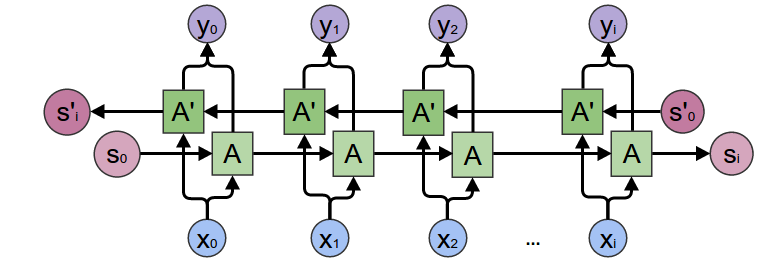

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

In [333]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, RNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [334]:
X_train.shape

(1985, 20, 2)

Modelin genişliğini arttırmaktansa deep liğini arttırmakta fayda var.

Burada X_train.shape[2] ifadesindeki 2, X_train veri setinin boyutlarından üçüncü boyutu ifade etmektedir.

Genellikle, makine öğrenimi problemlerinde veri setleri 2D (örneğin, tablo şeklinde) veya 3D (örneğin, görüntü veya zaman serisi verileri) şeklinde olabilir. 3D veri setlerinde, veriler bir dizi olarak temsil edilir ve üçüncü boyut, veri noktalarının farklı özelliklerini temsil eder.

Örneğin, bir zaman serisi veri seti düşünelim. Her bir veri noktası, zaman adımlarında ölçülen değerlerden oluşur. Bu durumda, X_train veri setinin şekli (örneğin) (100, 10, 3) olabilir. Burada 100, veri noktalarının sayısını, 10, her bir veri noktasında zaman adımlarının sayısını ve 3, her bir zaman adımında ölçülen özelliklerin sayısını temsil eder.

Bu nedenle, X_train.shape[2] ifadesi, X_train veri setinin üçüncü boyutunun boyutunu verir, yani her bir veri noktasında bulunan özelliklerin sayısını temsil eder.

In [335]:
y_train.shape

(1985,)

In [336]:
n_features = X_train.shape[2]

In [337]:
print(n_features)

2


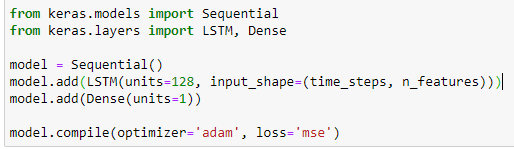

In [338]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))   #24 e 12 lik bir veri bekleyecek benden
#BIDIRECTIONAL ın yaptığı iş burada; (düz ve ters toplamı)
# 24 lük serilerimi önce 1 den 24 e kadar al sonra 24 den geriye doğru al ve bu ikisinin toplamının sonuçlarını bir sonraki katmana aktar. 
#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [339]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

restore_best_weights=True parametresi, eğitim sırasında erken durdurma (early stopping) kullanıldığında en iyi performans gösteren modelin ağırlıklarının geri yüklenmesini sağlar.

Erken durdurma, modelin eğitim sürecini kontrol etmek için kullanılan bir yöntemdir. Eğitim ilerledikçe, genellikle eğitim hatası (loss) azalırken doğrulama hatası artar. Ancak, doğrulama hatasının artması, modelin aşırı uyum (overfitting) yapabileceğini ve genelleme yeteneğinin azaldığını gösterebilir.

Erken durdurma, belirli bir sabır (patience) değerini belirleyerek doğrulama hatasının belirli bir süre boyunca azalmaması durumunda eğitimi durdurur. Bu, aşırı uyumu önlemek ve daha iyi bir genelleme yapmak için kullanışlı bir yöntemdir.

restore_best_weights=True parametresi, erken durdurma işlemi sonunda en iyi performans gösteren modelin ağırlıklarının geri yüklenmesini sağlar. Bu şekilde, erken durdurmaya karar verilen noktada kaydedilen en iyi modelin ağırlıkları kullanılır. Böylece, model eğitimi durdurulduğunda en iyi performans elde edilen noktada kalır ve bu ağırlıklar kullanılarak tahmin yapılır.

Bu yöntem, genellikle aşırı uyumu önlemek ve daha iyi bir genelleme yapmak için kullanılır.

In [340]:
#patience=5 dediğimizde sondan 5'nci değer benim en iyi değerim..
# en iyi ağırlığın olduğu yeri al diyoruz restore_best_weights ile..bunu demez isek en sondakini alır.. 
# ama en iyi değer farklı bir yerde de olabilir. en sondaki en iyiye göre düşük olacaktır muhtemelen.. 

In [341]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 RNN'de validation_split kullanımı, veri setini rastgele bölerken sıralamayı bozmaz ve zaman serileri üzerinde doğru sonuçlar elde etmek için uygun bir yaklaşımdır.

In [342]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [343]:
X_test = X_train.astype('float32')
y_test = y_train.astype('float32')

In [344]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5256 - val_loss: 0.2128
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3586 - val_loss: 0.2070
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3506 - val_loss: 0.2104
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3469 - val_loss: 0.2059
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3379 - val_loss: 0.2008
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3230 - val_loss: 0.1972
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3254 - val_loss: 0.1980
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3742 - val_loss: 0.2009
Epoch 9/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2847 - val_loss: 0.1993
Epoch 10/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3471 - val_loss: 0.1974
Epoch 11/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3246 - val_loss: 0.1978
Epoch 12/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.32

<Axes: >

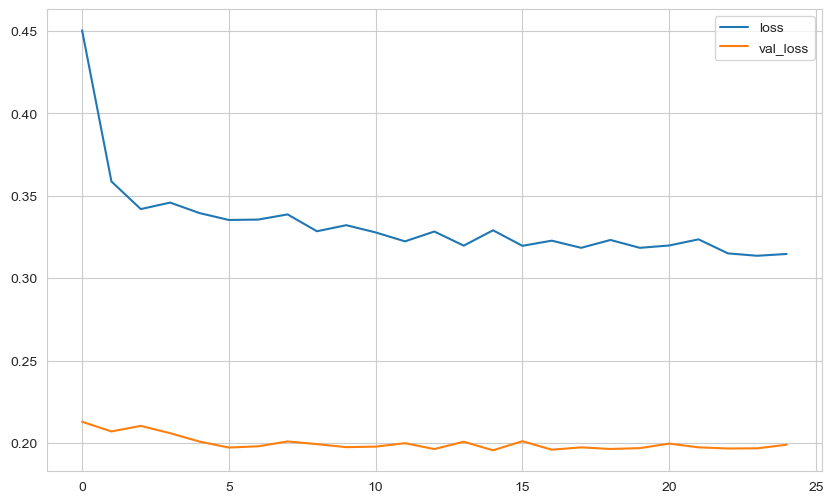

In [345]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [346]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

y_pred = model.predict(X_test)

eval_metrics(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
r2_score: 0.6261842250823975 
mae: 0.37395194 
mse: 0.27894315 
rmse: 0.5281507


#### LSTM

In [347]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(time_steps, n_features)))   #24 e 12 lik bir veri bekleyecek benden
#BIDIRECTIONAL ın yaptığı iş burada; (düz ve ters toplamı)
# 24 lük serilerimi önce 1 den 24 e kadar al sonra 24 den geriye doğru al ve bu ikisinin toplamının sonuçlarını bir sonraki katmana aktar. 
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(rate=0.2))# Aktivasyon fonksiyonu olarak "relu" kullanıldı
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="relu"))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [348]:
model.fit(X_train, y_train, 
          epochs=50, 
          batch_size=32, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5836 - val_loss: 0.2045
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4090 - val_loss: 0.2046
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3479 - val_loss: 0.2005
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3582 - val_loss: 0.2081
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3453 - val_loss: 0.1978
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3128 - val_loss: 0.1985
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3916 - val_loss: 0.1985
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3345 - val_loss: 0.2006
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3258 - val_loss: 0.1981
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3614 - val_loss: 0.1949
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3717 - val_loss: 0.1971
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3399 - val_lo

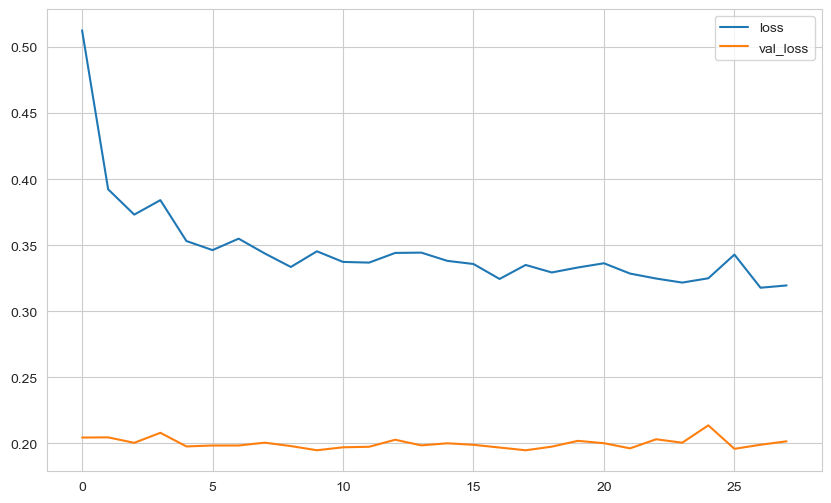

In [349]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [350]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

y_pred = model.predict(X_test)

eval_metrics(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
r2_score: 0.6230631470680237 
mae: 0.37013656 
mse: 0.28127214 
rmse: 0.530351


#### GRU

In [351]:
model = Sequential()
model.add(GRU(units=64, input_shape=(time_steps, n_features)))   #24 e 12 lik bir veri bekleyecek benden
#BIDIRECTIONAL ın yaptığı iş burada; (düz ve ters toplamı)
# 24 lük serilerimi önce 1 den 24 e kadar al sonra 24 den geriye doğru al ve bu ikisinin toplamının sonuçlarını bir sonraki katmana aktar. 
model.add(Dropout(rate=0.2))

model.add(Dense(32, activation="relu"))
model.add(Dropout(rate=0.1))# Aktivasyon fonksiyonu olarak "relu" kullanıldı
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [352]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6320 - val_loss: 0.2054
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3805 - val_loss: 0.1996
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3497 - val_loss: 0.2181
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3330 - val_loss: 0.2083
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4150 - val_loss: 0.1990
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3493 - val_loss: 0.2018
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3586 - val_loss: 0.1948
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3422 - val_loss: 0.1967
Epoch 9/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3389 - val_loss: 0.1939
Epoch 10/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3152 - val_loss: 0.1960
Epoch 11/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3415 - val_loss: 0.1946
Epoch 12/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3286 - val_lo

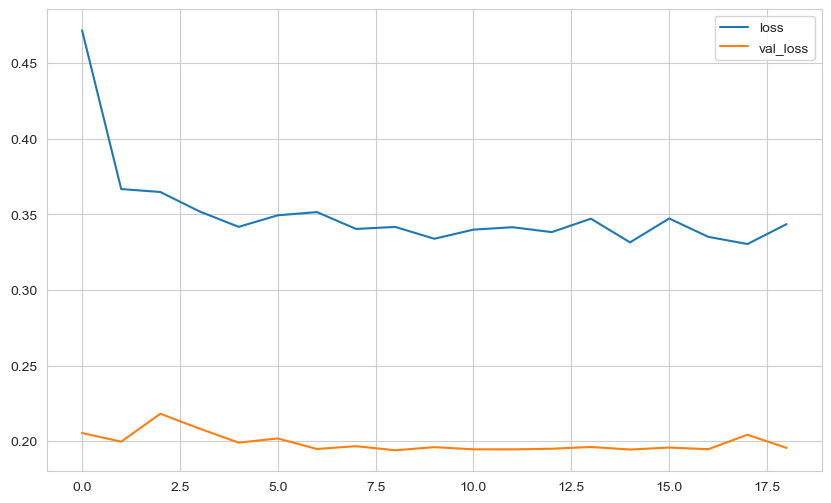

In [353]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

## 4. Evaluate on Test Data

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results

Plot predictions and actula values together

In [354]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [355]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [356]:
eval_metrics(y_test, y_pred)

r2_score: 0.6043813824653625 
mae: 0.3738812 
mse: 0.29521257 
rmse: 0.54333466


### Inverse Transformation and Compare

In [357]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   # reshape ile tek satır haline getirmiş oluyoruz
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))     # kaç sütun ise o kadar sütun olacak
y_pred_inv = target_transformer.inverse_transform(y_pred)

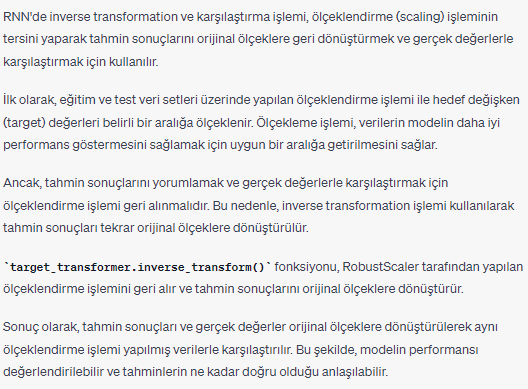

In [358]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
#pred_test.index = test_index

Bu kod, test verileri ile yapılan tahminlerin sonuçlarını düzenlemek için kullanılıyor. İşte bu kodun adım adım açıklaması:

İlk satırda, test veri çerçevesinin time_steps zaman adımı sonrasındaki indeksleri test_index adlı bir değişkene atanır. Bu, tahminlerin test verileri üzerinde yapılacağı zaman aralığını belirlemeye yardımcı olur.

İkinci satırda, tahmin sonuçlarını içeren y_test_inv ve y_pred_inv dizileri, bir veri çerçevesine dönüştürülür. y_test_inv, gerçek test verilerinin ters çevrilmiş (örneğin, ölçeklendirmenin ters çevrilmiş hali) halidir ve y_pred_inv, modelin yaptığı tahminlerin ters çevrilmiş hali olarak kabul edilir.

Üçüncü satırda, pd.concat fonksiyonu kullanılarak y_test_inv ve y_pred_inv veri çerçeveleri bir araya getirilir. Bu, tahminlerin gerçek test verileri ile birleştirilmesini sağlar.

Dördüncü satırda, sütun adları test ve prediction olarak ayarlanır. Bu adımlar sonucunda, pred_test adlı yeni bir veri çerçevesi oluşturulur.

Beşinci satırda, pred_test veri çerçevesinin indeksi test_index ile değiştirilir. Bu, verilerin uygun sırayla düzenlenmesini sağlar.

Sonuç olarak, pred_test veri çerçevesi, gerçek test verileri ve bu verileri kullanarak yapılan tahminlerin sonuçlarını içerir ve bu sonuçlar test_index ile düzenlenir. Bu şekilde, tahminlerin gerçek verilerle karşılaştırılması ve değerlendirilmesi için kullanılabilir.

In [359]:
pred_test

,test,prediction
0,2.390,3.262
1,3.389,2.933
2,2.970,2.862
3,1.897,2.840
4,5.693,2.493
...,...,...
1980,0.981,1.101
1981,1.569,1.079
1982,0.124,1.131
1983,0.782,0.882


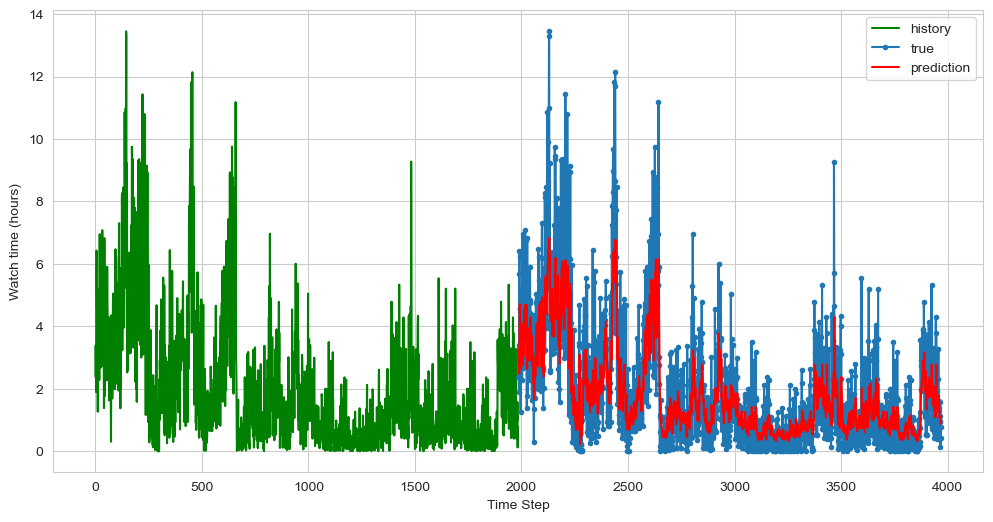

In [360]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Watch time (hours)')
plt.xlabel('Time Step')
plt.legend()
plt.show();

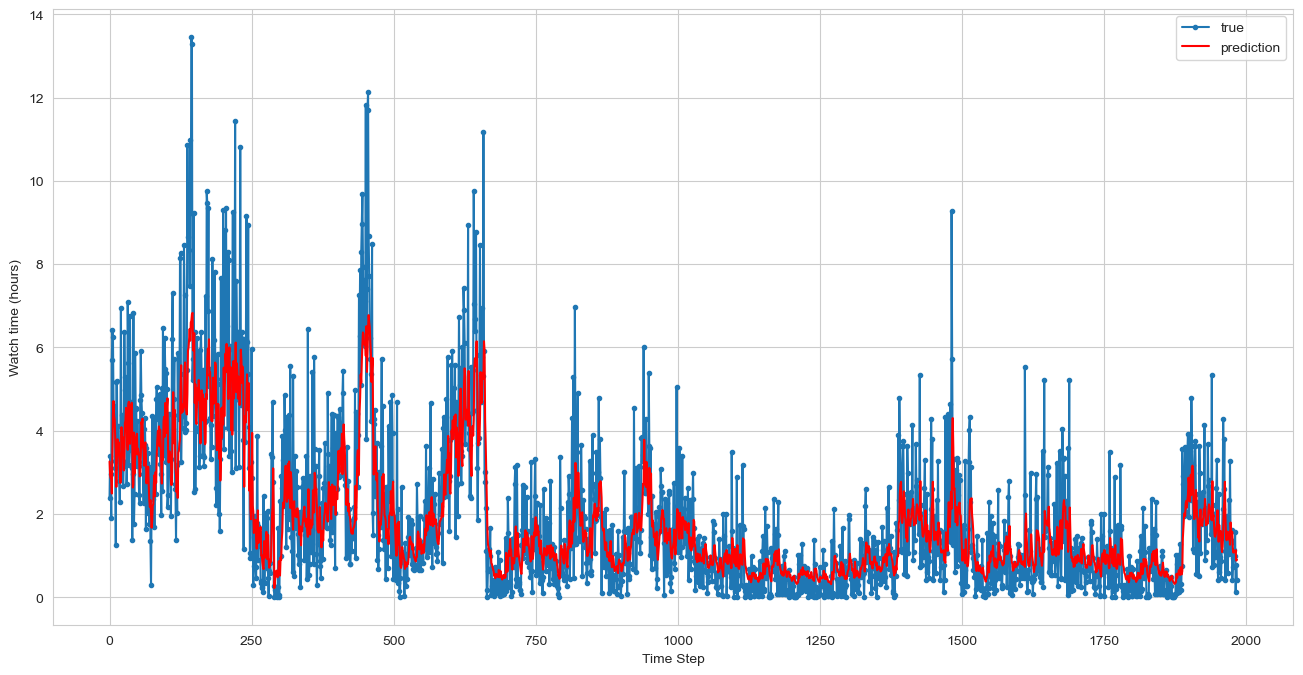

In [361]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Watch time (hours)')
plt.xlabel('Time Step')
plt.legend()
plt.show();

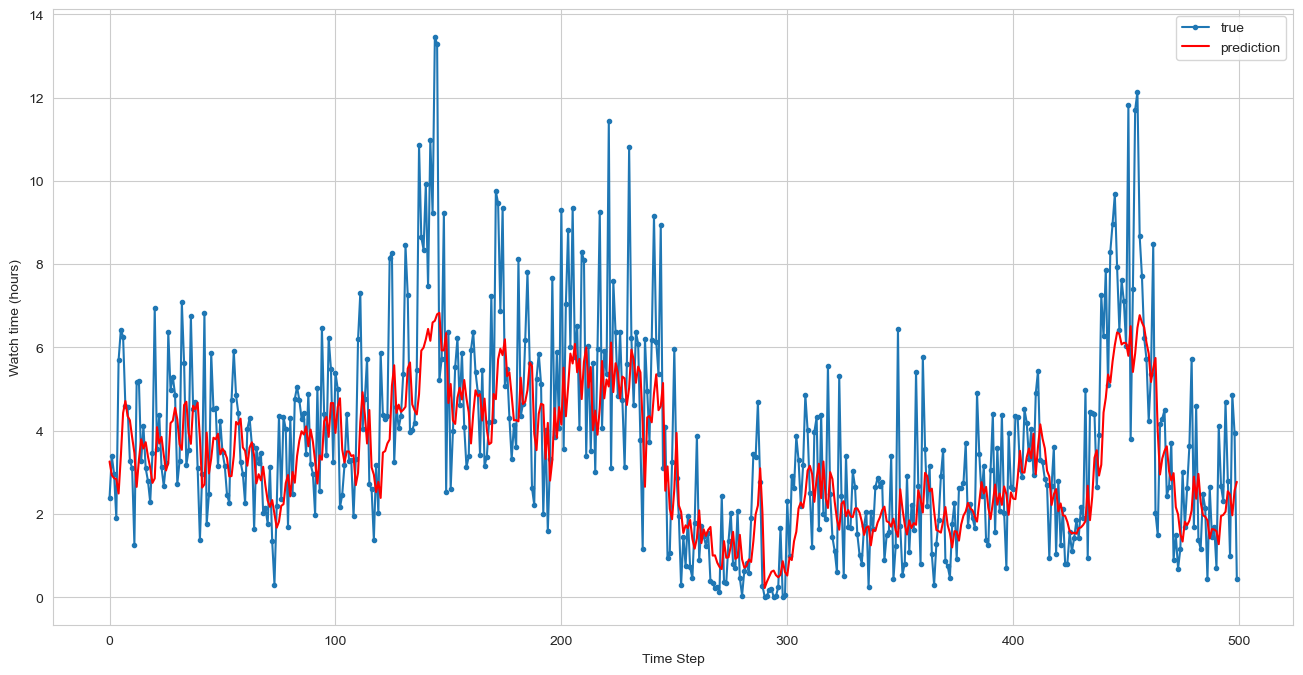

In [362]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten()[0:500], marker='.', label="true")
plt.plot(y_pred_inv.flatten()[0:500], 'r', label="prediction")
plt.ylabel('Watch time (hours)')
plt.xlabel('Time Step')
plt.legend()
plt.show();

## 5. Retrain and Forecasting

### Scale full data

Let's devide dataset as "full" and "val". We can think about this "val" data as the weather forecast of next days.

In [363]:
val_size = 20
val = df.iloc[-val_size:]
full = df.iloc[:-val_size]
print(len(full), len(val))

2208 20


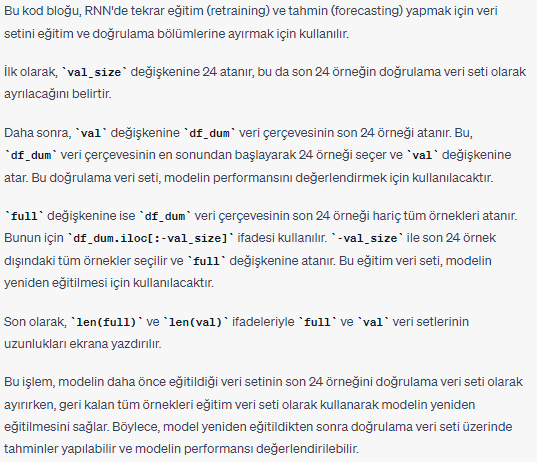

In [364]:
f_columns = ['Views']

f_transformer = RobustScaler()
target_transformer = RobustScaler()

full.loc[:, f_columns] = f_transformer.fit_transform(full[f_columns].to_numpy())
full['Watch time (hours)'] = target_transformer.fit_transform(full[['Watch time (hours)']])

val.loc[:, f_columns] = f_transformer.transform(val[f_columns])
val['Watch time (hours)'] = target_transformer.transform(val[['Watch time (hours)']])

In [365]:
full

,Watch time (hours),Views
Date,,
2021-01-01,0.418,0.189
2020-12-31,-0.349,-0.378
2020-12-30,0.614,0.541
2020-12-29,1.051,1.378
2020-12-28,2.750,3.541
...,...,...
2024-01-25,-0.440,-0.595
2024-01-24,-0.125,0.000
2024-01-23,0.055,0.000


### reshape to [samples, time_steps, n_features]

In [366]:
X, y = create_dataset(full, full["Watch time (hours)"], time_steps)

print(X.shape, y.shape)

(2188, 20, 2) (2188,)


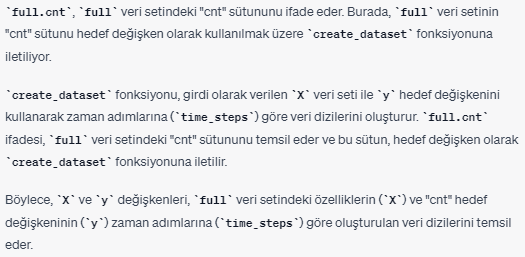

### Create Final model with full data 

In [367]:
X = X.astype('float32')
y = y.astype('float32')

In [368]:
model = Sequential()
model.add(GRU(units=64, input_shape=(time_steps, n_features)))   #24 e 12 lik bir veri bekleyecek benden
#BIDIRECTIONAL ın yaptığı iş burada; (düz ve ters toplamı)
# 24 lük serilerimi önce 1 den 24 e kadar al sonra 24 den geriye doğru al ve bu ikisinin toplamının sonuçlarını bir sonraki katmana aktar. 
model.add(Dropout(rate=0.2))

model.add(Dense(32, activation="relu"))
model.add(Dropout(rate=0.1))# Aktivasyon fonksiyonu olarak "relu" kullanıldı
model.add(Dense(16, activation="tanh"))
model.add(Dense(8, activation="tanh"))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [369]:
model.fit(X, y, 
          epochs=20, 
          batch_size=32        
         )

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4964
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3516
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3412
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2978
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3600
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3458
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3195
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3160
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3303
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3535
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3272
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3699
Epoch 13/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3544
Epoch 14/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3121
Epoch 15/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3070
Epoch 16/20
69/69 ━

<Axes: >

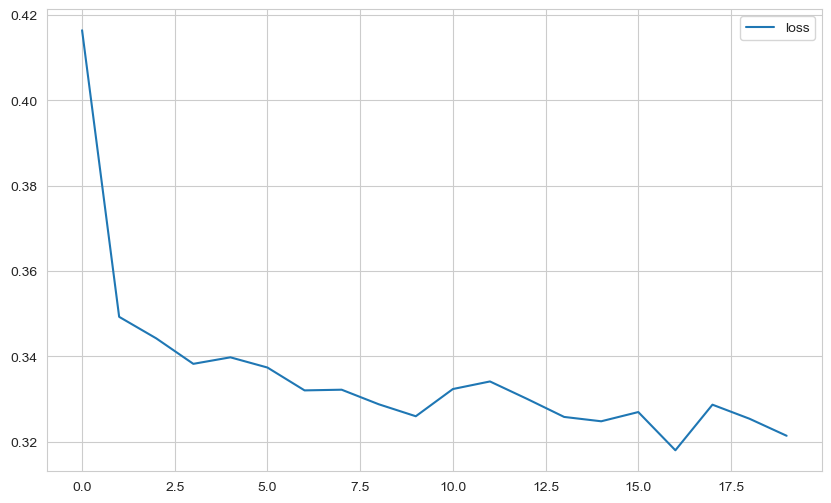

In [370]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### forecasting

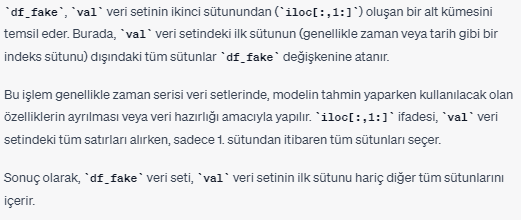

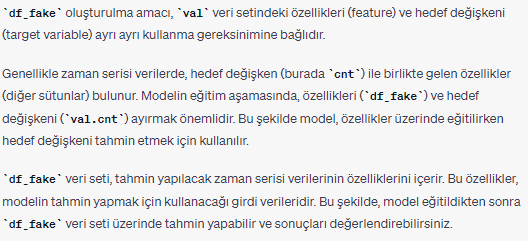

In [371]:
df_fake = val.iloc[:,1:]
df_fake

,Views
Date,
2024-01-20,-0.514
2024-01-19,0.000
2024-01-18,0.514
2024-01-17,1.622
2024-01-16,0.919
2024-01-15,0.459
2024-01-14,0.270
2024-01-13,0.324
2024-01-12,-0.378


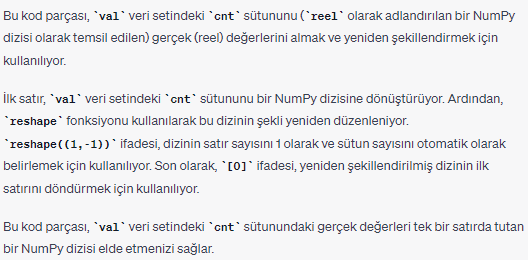

In [372]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([-0.36688449, -0.35241877,  0.27967818,  1.27964385,  0.95668296,
        0.96542648,  0.04941691,  0.77000195, -0.37489557,  0.4876    ,
        0.14880005, -0.07688346, -0.53781801,  1.07831401, -0.06983371,
        1.81844608, -0.49103331, -0.45514368, -0.49876973, -0.02767255])

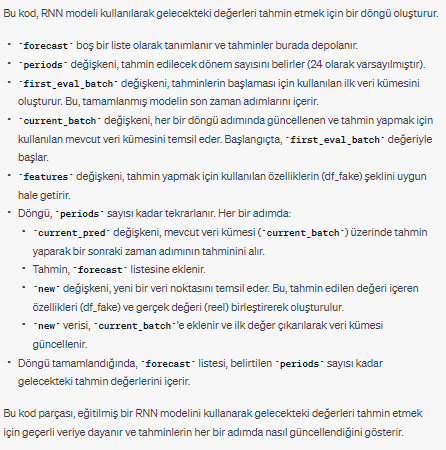

In [373]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 20

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
current_batch = current_batch.astype('float32')

features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [374]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: -0.07924726097177115 
mae: 0.6017004989153396 
mse: 0.49833710337933235 
rmse: 0.7059299564258004


In [375]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[2.0621588, 1.2863498, 1.2381026, 1.616654 , 2.2043185, 2.2629378,
        2.2707307, 2.090637 , 2.2261746, 1.6335075, 1.9184723, 2.0129251,
        1.8509507, 1.228644 , 1.9173353, 1.629739 , 2.1941643, 1.5565085,
        1.233143 , 1.0880792]], dtype=float32)

In [376]:
forecast_index = pd.date_range(start = '2024-11-17 00:00:00', periods = periods, freq = 'H')

In [377]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

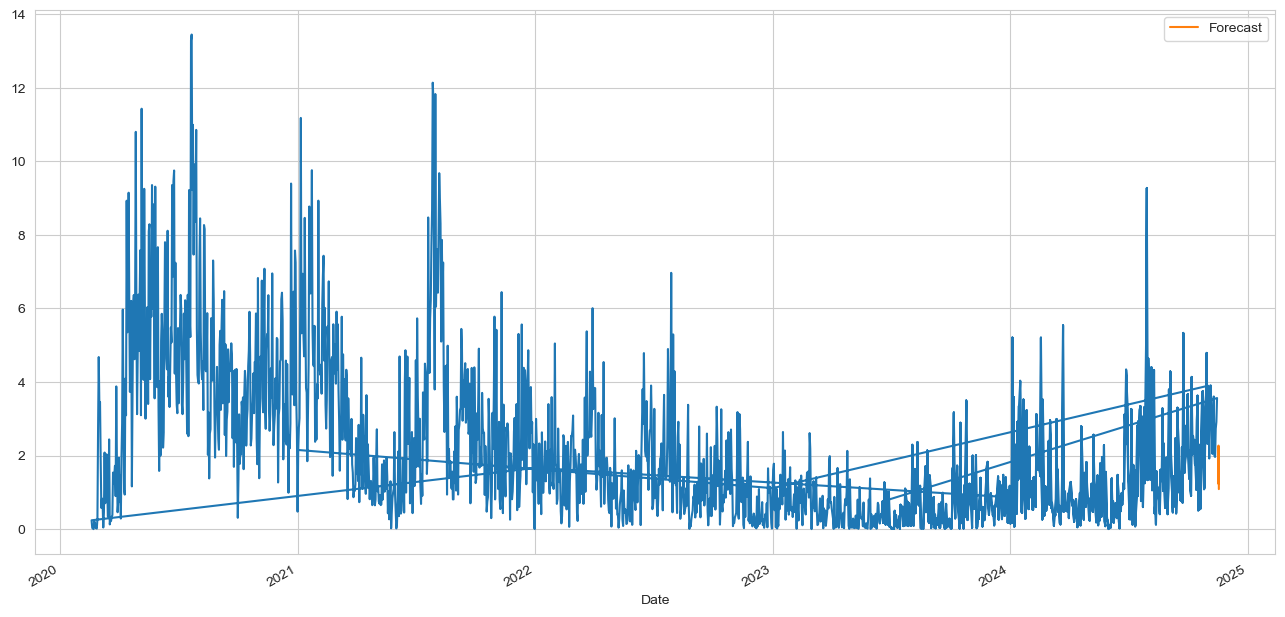

In [378]:
ax = df["Watch time (hours)"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(20044.0, 20045.958333333332)

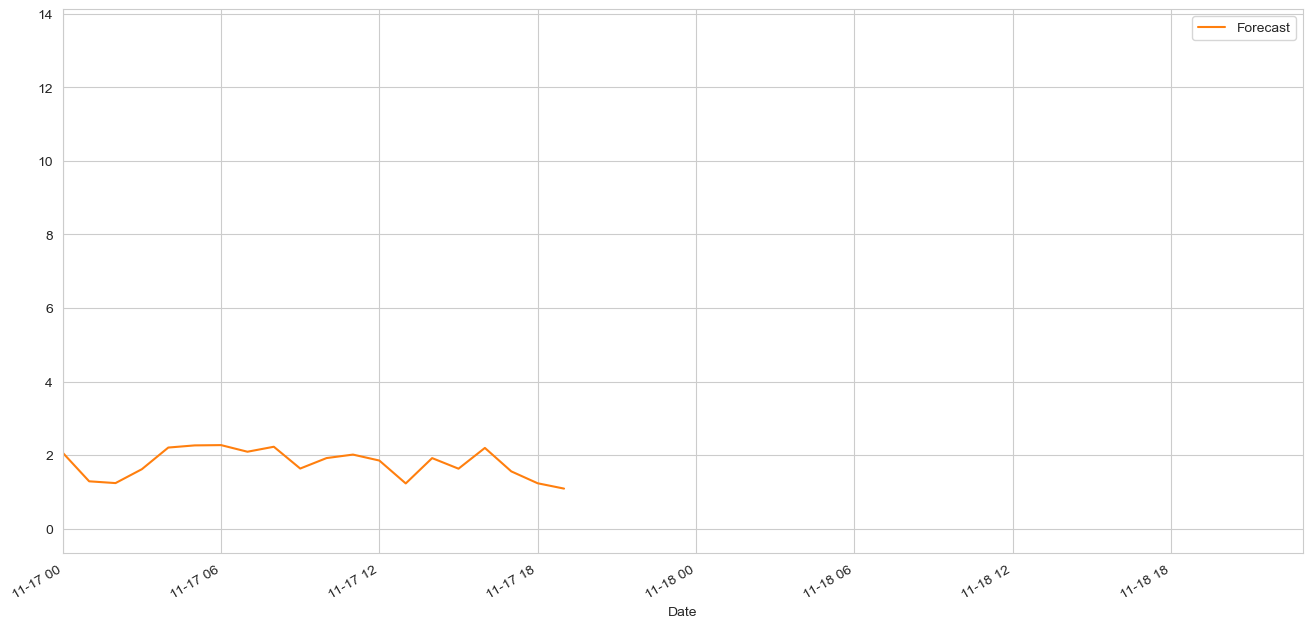

In [379]:
ax = df["Watch time (hours)"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2024-11-17 00:00:00', '2024-11-18 23:00:00')